### <img src='fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Introducción al Análisis Estadístico con Lenguajes de Programación para Machine Learning (IAELPML). 2023-2024.
</h1>


<h1 style='font-family: Optima;color:#ecac00'>
Assignment
<a class="tocSkip">    
</h1>  
   

<h1 style='font-family: Optima;color:red'>
Due Date: 2023-11-28
<a class="tocSkip">    
</h1>  


# FINAL COURSE PROJECT

# MADE BY: 

# Manuel Oliveira Pineiro, 202305593@alu.comillas.edu
# Alberto García Martín, 202309188@alu.comillas.edu
# Jorge Peralta Fernández-Revuelta, jperalta@alu.comillas.edu 
# Juan López Segura, 202308780@alu.comillas.edu

# CODE

## First Steps

Before starting, we must import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

First of all, we load the dataset into a pandas DataFrame named Housing.csv downloaded from *https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction?resource=download*. After that, we take a look at the first 10 rows, shape of the DataFrame and type of columns in order to understand the variables.

In [2]:
houses = pd.read_csv('Data/Housing.csv', sep=",", header=0)

houses.head(n = 10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
print("Shape of the DataFrame = \n", houses.shape)

Shape of the DataFrame = 
 (545, 13)


In [4]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


As we can see, the data file is moderately easy to understand, as well as the information that the columns contain. There are 13 different variables, 545 observations, and no missing values. Nonetheless, we are going to check it.

## Missing Data

The code to eliminate the missing data is really simple, using the code below:

In [5]:
houses = houses.dropna()
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Obviously, there are some examples where we would like to assign values, instead of removing the observations, but for our example none of these is necessary.

## Factor Conversion

The next step is to identify the variables that should be factor due to its values, range, etc. There are some of them (the binaries and the string ones) whose type is designated as object, crearly factors, but maybe some of the *int64* ones go unnoticed.

In [6]:
houses.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


As we can see, the variables `bedrooms`, `bathrooms`, `stories` and `parking` should be treated as a factor, so we proceed in the cell below.

In [7]:
houses = houses.astype({'bedrooms':'category', 'bathrooms':'category', 'stories':'category', 'parking':'category', 
                        'mainroad':'category', 'guestroom':'category', 'basement':'category', 'hotwaterheating':'category', 
                        'airconditioning':'category', 'prefarea':'category', 'furnishingstatus':'category'})

Another option:

In [8]:
# factorCols = houses.select_dtypes(include='object').columns
# factorCols
#houses.loc[:, factorCols] = houses.loc[:, factorCols].astype('category')

In [9]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             545 non-null    int64   
 1   area              545 non-null    int64   
 2   bedrooms          545 non-null    category
 3   bathrooms         545 non-null    category
 4   stories           545 non-null    category
 5   mainroad          545 non-null    category
 6   guestroom         545 non-null    category
 7   basement          545 non-null    category
 8   hotwaterheating   545 non-null    category
 9   airconditioning   545 non-null    category
 10  parking           545 non-null    category
 11  prefarea          545 non-null    category
 12  furnishingstatus  545 non-null    category
dtypes: category(11), int64(2)
memory usage: 16.2 KB


Now that we have our data set prepared, we start with the study of each column.

## Detailed Exploratory Analysis

### Variable `price`

As a first approach, we can calculate some statistical measures for our variables. We start with the `price`, that obviously indicates the value of the house.

In [10]:
houses['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [11]:
print('The mean of the price variable is: ', houses['price'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the price variable is: ', houses['price'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the price variable is: ', houses['price'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the price variable is: ', houses['price'].median())
print('\n','-'*70,'\n')
print('The minimum value of the price variable is: ', houses['price'].min())
print('\n','-'*70,'\n')
print('The maximum value of the price variable is: ', houses['price'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the price variable is: ', houses['price'].std(),'\n')

The mean of the price variable is:  4766729.247706422

 ---------------------------------------------------------------------- 

The first quartile of the price variable is:  3430000.0

 ---------------------------------------------------------------------- 

The third quartile of the price variable is:  5740000.0

 ---------------------------------------------------------------------- 

The median of the price variable is:  4340000.0

 ---------------------------------------------------------------------- 

The minimum value of the price variable is:  1750000

 ---------------------------------------------------------------------- 

The maximum value of the price variable is:  13300000

 ---------------------------------------------------------------------- 

The standard deviation of the price variable is:  1870439.6156573922 



Now, we can observe a table with absolute frequencies of our variables.

In [12]:
houses['price'].value_counts().sort_index()

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Name: count, Length: 219, dtype: int64

Our table suggest that we should handle our variable as a continuous one to obtain good graphical results because most values of this variable appear only once in the table.

So, we will define four classes as follows:
- $price \leq 3500000$: cheap houses.
- $3500000 < price \leq 7000000$: medium-price houses.
- $7000000 < price \leq 10000000$: expensive houses.
- $10000000 < price $: overpriced houses.

Next step is to build our intervals (classes) and check which interval corresponds to each observation.

In [13]:
bins = [1329000, 3500000, 7000000, 10000000, 13300000]
pd.cut(houses['price'], bins = bins, ordered = True)

0      (10000000, 13300000]
1      (10000000, 13300000]
2      (10000000, 13300000]
3      (10000000, 13300000]
4      (10000000, 13300000]
               ...         
540      (1329000, 3500000]
541      (1329000, 3500000]
542      (1329000, 3500000]
543      (1329000, 3500000]
544      (1329000, 3500000]
Name: price, Length: 545, dtype: category
Categories (4, interval[int64, right]): [(1329000, 3500000] < (3500000, 7000000] < (7000000, 10000000] < (10000000, 13300000]]

We add a column to our dataframe with the interval for each record.

In [14]:
houses['price_binned'] = pd.cut(houses['price'], bins = bins, ordered = True)
houses['price_binned'].value_counts().sort_index()

price_binned
(1329000, 3500000]      158
(3500000, 7000000]      323
(7000000, 10000000]      56
(10000000, 13300000]      8
Name: count, dtype: int64

Let's check it.

In [15]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"


We plot now our binned variable with an histogram.

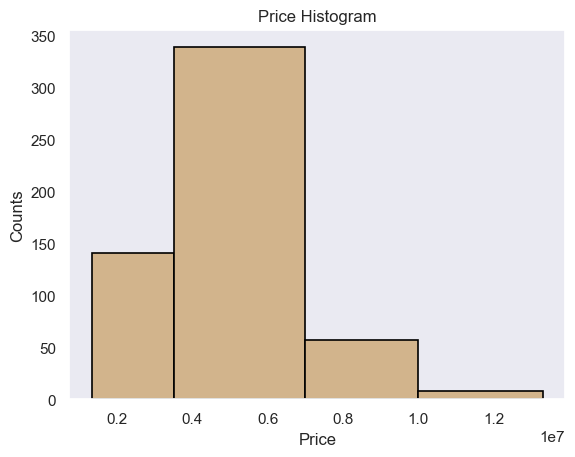

In [16]:
sns.set()
plot = houses.hist('price', edgecolor = 'black', linewidth = 1.2, 
                   grid = False, color = 'tan', bins = bins) 

plt.xlabel('Price')
plt.ylabel('Counts')
plt.title('Price Histogram')
plt.show()

As we could expect, medium-priced houses are the most common class, while overpriced houses are less often seen.

We can represent our not-binned variable with an histogram, as well as a density plot.

C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


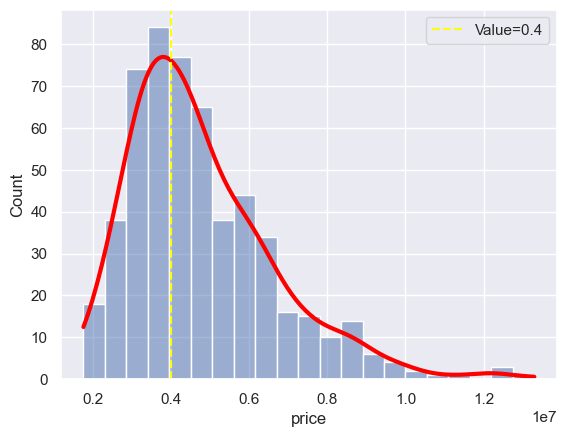

In [17]:
dens_plot = sns.histplot(data = houses, x = 'price', kde = True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
plt.axvline(x = 0.4*1e7, color = 'yellow', linestyle = '--', label = f'Value={0.4}')
plt.legend()

We can see in the plot how we have a unimodal distribution that is slightly right sweked. The mode is centered at a slightly lower number than 0.4 (in terms of 1e7). Additionally, the density curve resembles slightly a Gaussian bell curve, so we will check if we can assume that its distribution is normal.

We will check it with a QQplot. If our variable is normally-distributed, the points should fall on a line.

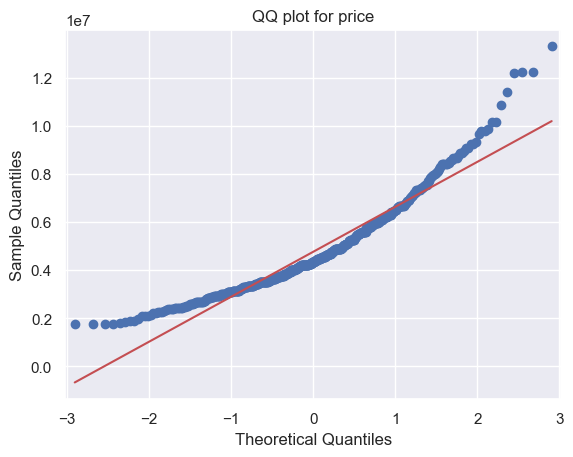

In [18]:
sm.qqplot(houses['price'], line='s')
plt.title('QQ plot for price')
plt.show()

So, we cannot assume that our variable is normally-distributed, since there are a large proportion of the points not falling in the line.

Finally, we represent our variable with a mix of two graphics: a violinplot and a boxplot.

C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


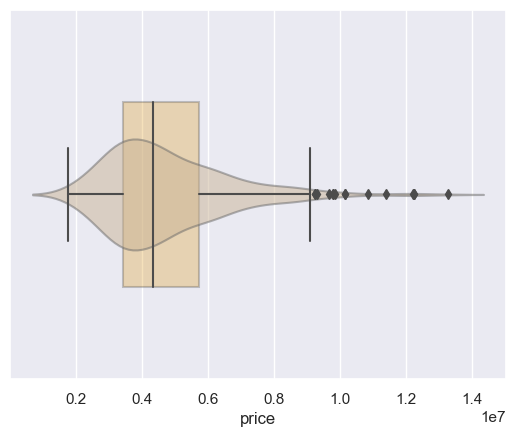

In [19]:
ax = sns.boxplot(x = 'price', data = houses, width = 0.5, color = 'orange', boxprops = dict(alpha = 0.3))
ax = sns.violinplot(x = 'price', data = houses, width = 0.3, alpha = 0.3, color = 'tan', inner = None)

for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

We have some outliers at the top of the plot, but not at the bottom, so we will locate them:

In [20]:
price_iqr = stats.iqr(houses['price'])
price_q1, price_q3 = np.quantile(houses['price'], [0.25, 0.75])

cut_low = price_q1 - 1.5 * price_iqr
cut_high = price_q3 + 1.5 * price_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

price_outliers = houses.loc[(houses['price'] > cut_high)]

print("The outliers are")

price_outliers

Lower and upper outlier limits: -35000.0 ,  9205000.0
The outliers are


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,"(10000000, 13300000]"
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,"(10000000, 13300000]"
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,"(10000000, 13300000]"
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,"(7000000, 10000000]"
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,"(7000000, 10000000]"


In [21]:
print('So, we have', price_outliers.shape[0], 'outliers:',
    price_outliers[price_outliers['price'] > 10000000].shape[0],
     'are from overpriced houses class and', 
      price_outliers[price_outliers['price'] <= 10000000].shape[0],
     'are from expensive houses class.')

So, we have 15 outliers: 8 are from overpriced houses class and 7 are from expensive houses class.


In [22]:
houses.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,"(10000000, 13300000]"
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,"(10000000, 13300000]"
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,"(10000000, 13300000]"
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,"(10000000, 13300000]"
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,"(10000000, 13300000]"


### Variable `area`

Now we continue with the second quantitative: the total area of the house in square feet.

In [23]:
houses['price'].describe()

count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06
max      1.330000e+07
Name: price, dtype: float64

In [24]:
print('The mean of the area variable is: ', houses['area'].mean())
print('\n','-'*70,'\n')
print('The first quartile of the area variable is: ', houses['area'].quantile(0.25))
print('\n','-'*70,'\n')
print('The third quartile of the area variable is: ', houses['area'].quantile(0.75))
print('\n','-'*70,'\n')
print('The median of the area variable is: ', houses['area'].median())
print('\n','-'*70,'\n')
print('The minimum value of the area variable is: ', houses['area'].min())
print('\n','-'*70,'\n')
print('The maximum value of the area variable is: ', houses['area'].max())
print('\n','-'*70,'\n')
print('The standard deviation of the area variable is: ', houses['area'].std(),'\n')

The mean of the area variable is:  5150.54128440367

 ---------------------------------------------------------------------- 

The first quartile of the area variable is:  3600.0

 ---------------------------------------------------------------------- 

The third quartile of the area variable is:  6360.0

 ---------------------------------------------------------------------- 

The median of the area variable is:  4600.0

 ---------------------------------------------------------------------- 

The minimum value of the area variable is:  1650

 ---------------------------------------------------------------------- 

The maximum value of the area variable is:  16200

 ---------------------------------------------------------------------- 

The standard deviation of the area variable is:  2170.141022508803 



Now, we can observe a table with absolute frequencies of our variables.

In [25]:
houses['price'].value_counts().sort_index()

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Name: count, Length: 219, dtype: int64

In this particular case, it is possible to categorize the variable into three distinct classes, small, medium, and large houses. However, we have reservations about the utility of this categorization for the analysis. If we would have proceed with this categorization, it would be the same process of classifying the variable "price".

We can represent our variable with an histogram, as well as a density plot.

C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


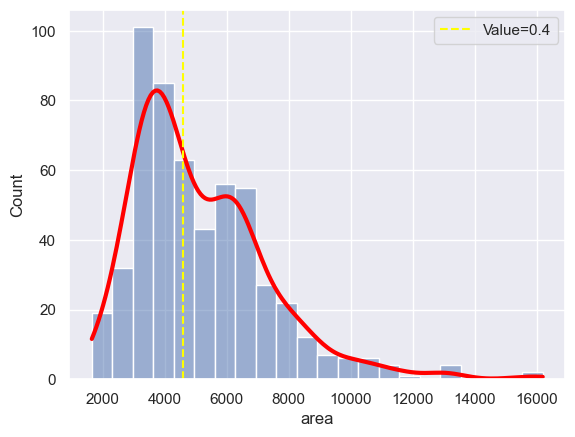

In [26]:
dens_plot = sns.histplot(data = houses, x = "area", kde = True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
plt.axvline(x = 0.46*1e4, color = 'yellow', linestyle = '--', label = f'Value={0.4}')
plt.legend()

We can see in the plot how we have a distribution that is slightly right sweked, and similar to a multimodal. The mode is centered at a slightly greater number than 4000 square feet. Additionally, we will check if we can assume that its distribution is normal.

We will check it with a QQplot. If our variable is normally-distributed, the points should fall on a line.

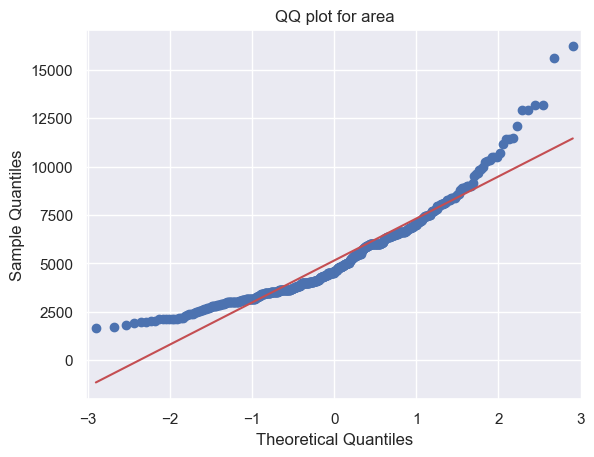

In [27]:
sm.qqplot(houses['area'], line='s')
plt.title('QQ plot for area')
plt.show()

Like the variable 'price', we cannot assume that our variable is normally-distributed, since there are a large proportion of the points not falling in the line.

Finally, we represent our variable with a mix of two graphics: a violinplot and a boxplot.

C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\juanl\anaconda3\envs\IAELPML\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


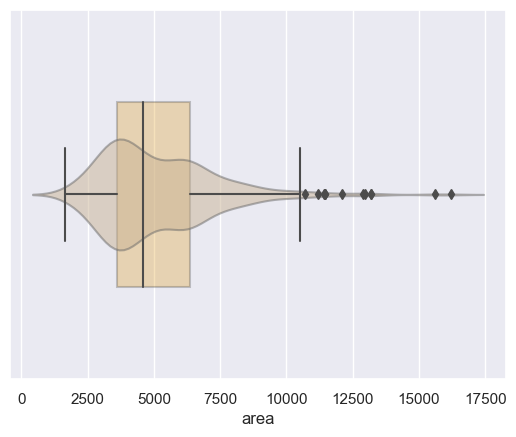

In [28]:
ax = sns.boxplot(x = 'area', data = houses, width = 0.5, color = 'orange', boxprops = dict(alpha = 0.3))
ax = sns.violinplot(x = 'area', data = houses, width = 0.3, alpha = 0.3, color = 'tan', inner = None)

for violin, alpha in zip(ax.collections[::2], [0.5]):
    violin.set_alpha(alpha)

We have some outliers at the top of the plot, but not at the bottom, so we will locate them:

In [29]:
area_iqr = stats.iqr(houses['area'])
area_q1, area_q3 = np.quantile(houses['area'], [0.25, 0.75])

cut_low = area_q1 - 1.5 * area_iqr
cut_high = area_q3 + 1.5 * area_iqr

print("Lower and upper outlier limits:", cut_low, ", ", cut_high)

area_outliers = houses.loc[(houses['area'] > cut_high)]
print('We have', area_outliers.shape[0], 'outliers.')
print("The outliers are")
area_outliers


Lower and upper outlier limits: -540.0 ,  10500.0
We have 12 outliers.
The outliers are


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_binned
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,"(10000000, 13300000]"
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,"(7000000, 10000000]"
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished,"(7000000, 10000000]"
64,7000000,11175,3,1,1,yes,no,yes,no,yes,1,yes,furnished,"(3500000, 7000000]"
66,6930000,13200,2,1,1,yes,no,yes,yes,no,1,no,furnished,"(3500000, 7000000]"
69,6790000,12090,4,2,2,yes,no,no,no,no,2,yes,furnished,"(3500000, 7000000]"
125,5943000,15600,3,1,1,yes,no,no,no,yes,2,no,semi-furnished,"(3500000, 7000000]"
129,5873000,11460,3,1,3,yes,no,no,no,no,2,yes,semi-furnished,"(3500000, 7000000]"
186,5110000,11410,2,1,2,yes,no,no,no,no,0,yes,furnished,"(3500000, 7000000]"
191,5040000,10700,3,1,2,yes,yes,yes,no,no,0,no,semi-furnished,"(3500000, 7000000]"


### Variable `bedrooms`

We continue with this column, the number of bedrooms in the house. We start creating the tables of absolute and relative frequencies for our variable.

In [30]:
print(houses['bedrooms'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_1 = houses['bedrooms'].value_counts().sort_index()
print(AbsFreq_1)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['bedrooms'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      6
top         3
freq      300
Name: bedrooms, dtype: int64
------------------------------ 

Absolute Frequency: 

bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

bedrooms
1    0.003670
2    0.249541
3    0.550459
4    0.174312
5    0.018349
6    0.003670
Name: proportion, dtype: float64
------------------------------ 



Now, we compute some statistical measures.

In [65]:
mean_1 = (AbsFreq_1.index.astype(int)*AbsFreq_1).sum()/AbsFreq_1.values.sum()
print('The mean of the bedrooms variable is: ', mean_1)
print('\n','-'*70,'\n')
print('The mode of the bedrooms variable is: ', houses['bedrooms'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
print('The median of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[len(houses) // 2])
print('\n','-'*70,'\n')
print('The minimum value of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the bedrooms variable is: ', houses['bedrooms'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the bedrooms variable is: ', np.sqrt(((AbsFreq_1.index.astype(int) - mean_1) ** 2 * AbsFreq_1).sum() / AbsFreq_1.sum()),'\n')

The mean of the bedrooms variable is:  2.9651376146788992

 ---------------------------------------------------------------------- 

The mode of the bedrooms variable is:  3

 ---------------------------------------------------------------------- 

The first quartile of the bedrooms variable is:  2

 ---------------------------------------------------------------------- 

The third quartile of the bedrooms variable is:  3

 ---------------------------------------------------------------------- 

The median of the bedrooms variable is:  3

 ---------------------------------------------------------------------- 

The minimum value of the bedrooms variable is:  1

 ---------------------------------------------------------------------- 

The maximum value of the bedrooms variable is:  6

 ---------------------------------------------------------------------- 

The standard deviation of the bedrooms variable is:  0.7373864268686331 



Finally, we represent a barplot showing the relative frequencies, in order to represent the probabilities of the different number of bedrooms.


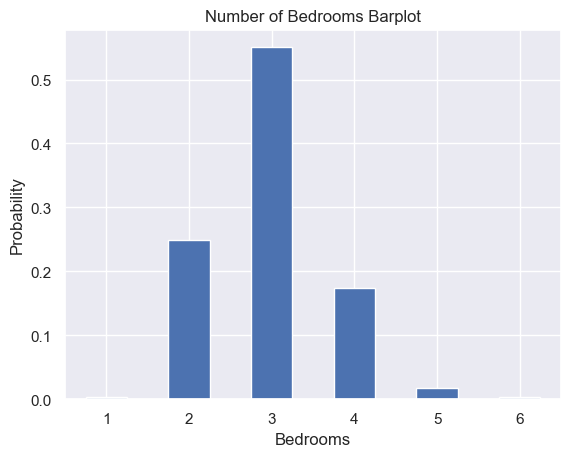

In [34]:
RelFreq_1 = houses['bedrooms'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_1.plot.bar(rot=0, xlabel='Bedrooms', ylabel ='Probability')
plt.title('Number of Bedrooms Barplot')
plt.show()

We can say that the most common number of bedrooms is 3, since the less often seen number of bedrooms is 1 and 6, which makes sense. Notice that 3 is the median and almost the mean of our variable, so we could expect this result. In the other hand, 1 and 6 bedrooms are the extreme values, so it could be expected too. 

### Variable `bathrooms`

The next variable to study is `bathrooms`, that indicates the number of bathrooms in the house.

We create now the tables of absolute and relative frequencies for our variable.

In [35]:
print(houses['bathrooms'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_2 = houses['bathrooms'].value_counts().sort_index()
print(AbsFreq_2)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['bathrooms'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         1
freq      401
Name: bathrooms, dtype: int64
------------------------------ 

Absolute Frequency: 

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

bathrooms
1    0.735780
2    0.244037
3    0.018349
4    0.001835
Name: proportion, dtype: float64
------------------------------ 



In [ ]:
mean_2 = (AbsFreq_2.index.astype(int)*AbsFreq_2).sum()/AbsFreq_2.values.sum()
print('The mean of the bathrooms variable is: ', mean_2)
print('\n','-'*70,'\n')
print('The mode of the bathrooms variable is: ', houses['bathrooms'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
print('The median of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[len(houses) // 2])
print('\n','-'*70,'\n')
print('The minimum value of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the bathrooms variable is: ', houses['bathrooms'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the bathrooms variable is: ', np.sqrt(((AbsFreq_2.index.astype(int) - mean_2) ** 2 * AbsFreq_2).sum() / AbsFreq_2.sum()),'\n')

Finally, we represent a barplot showing the relative frequencies, in order to represent the probabilities of the different number of bathrooms.

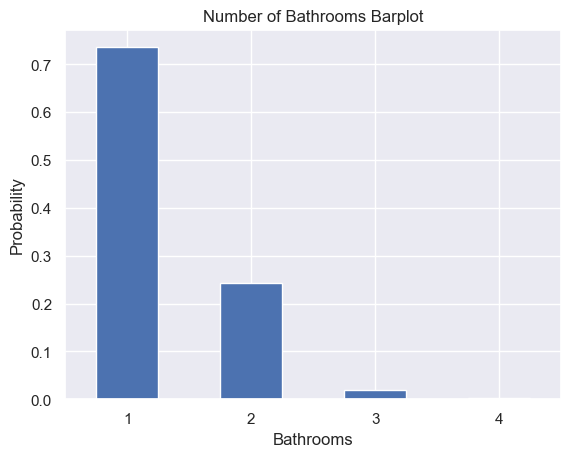

In [36]:
RelFreq_2 = houses['bathrooms'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_2.plot.bar(rot=0, xlabel='Bathrooms', ylabel ='Probability')
plt.title('Number of Bathrooms Barplot')
plt.show()

We can say that the most common number of bathrooms is 1, since the less often seen number of bathrooms is 4 and 3, which makes sense. 

### Variable `stories`

We move on to studying the variable stories, which logically represents the amount of floors/stories in the observed houses.

In [37]:
print(houses['stories'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
AbsFreq_3 = houses['stories'].value_counts().sort_index()
print(AbsFreq_3)
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['stories'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         2
freq      238
Name: stories, dtype: int64
------------------------------ 

Absolute Frequency: 

stories
1    227
2    238
3     39
4     41
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

stories
1    0.416514
2    0.436697
3    0.071560
4    0.075229
Name: proportion, dtype: float64
------------------------------ 



In [ ]:
mean_3 = (AbsFreq_3.index.astype(int)*AbsFreq_3).sum()/AbsFreq_3.values.sum()
print('The mean of the stories variable is: ', mean_3)
print('\n','-'*70,'\n')
print('The mode of the stories variable is: ', houses['stories'].mode().values[0])
print('\n','-'*70,'\n')
print('The first quartile of the stories variable is: ', houses['stories'].sort_values().values[len(houses) // 4])
print('\n','-'*70,'\n')
print('The third quartile of the stories variable is: ', houses['stories'].sort_values().values[3*len(houses) // 4])
print('\n','-'*70,'\n')
print('The median of the stories variable is: ', houses['stories'].sort_values().values[len(houses) // 2])
print('\n','-'*70,'\n')
print('The minimum value of the stories variable is: ', houses['stories'].sort_values().values[0])
print('\n','-'*70,'\n')
print('The maximum value of the stories variable is: ', houses['stories'].sort_values().values[-1])
print('\n','-'*70,'\n')
print('The standard deviation of the stories variable is: ', np.sqrt(((AbsFreq_3.index.astype(int) - mean_3) ** 2 * AbsFreq_3).sum() / AbsFreq_3.sum()),'\n')

As we are doing in the rest of categorical variables, we graphicate a barplot to study the variable. There are other plots, such as the barplot with absolute frequencies or the pieplot, but as we can see, the information obtained from them is the same.

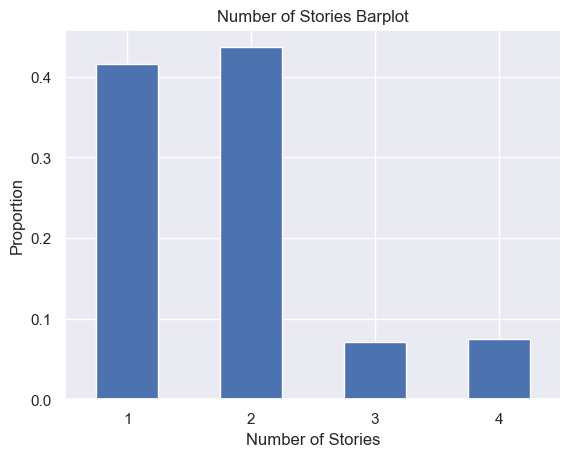

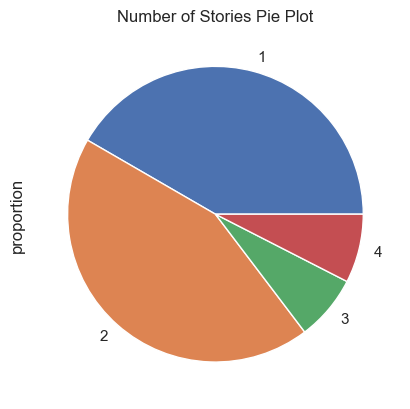

In [38]:
RelFreq_3 = houses['stories'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_3.plot.bar(rot=0, xlabel='Number of Stories', ylabel ='Proportion')
plt.title('Number of Stories Barplot')
plt.show()
plot = RelFreq_3.plot.pie(rot=0, xlabel='Number of Stories')
plt.title('Number of Stories Pie Plot')
plt.show()

### Variable `mainroad`

It is a binary variable so it can only take two values: whether the house is connected to the main road (Yes/No).

First of all, we create the same previous tables of frequencies of our variable.

We build now the relative frequencies' table.

Finally, we represent a barplot with the relative frequencies.


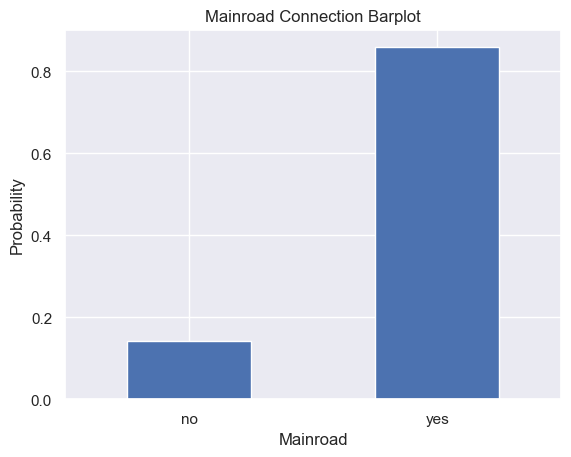

In [39]:
RelFreq_4 = houses['mainroad'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_4.plot.bar(rot=0, xlabel='Mainroad', ylabel ='Probability')
plt.title('Mainroad Connection Barplot')
plt.show()

As a result of our plot, we can affirm that being connected to the mainroad is much more frequent than not being connected to the mainroad.

### Variable `guestroom`

It is also a binary variable so it can only take two values.

Finally, we represent a barplot with the relative frequencies.

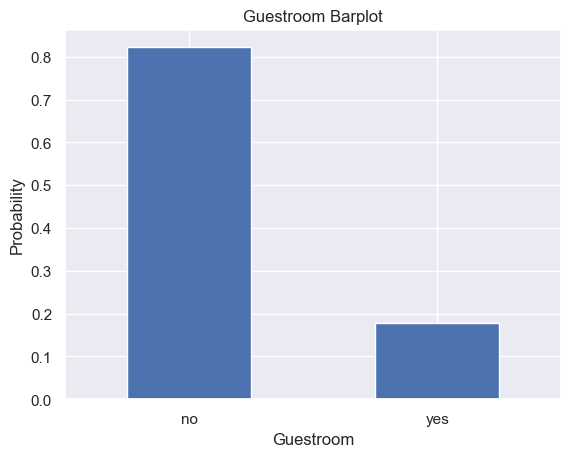

In [40]:
RelFreq_4 = houses['guestroom'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_4.plot.bar(rot=0, xlabel='Guestroom', ylabel ='Probability')
plt.title('Guestroom Barplot')
plt.show()

The next variable to study is going to be `parking`.

### Variable `parking`

As we can imagine, this column specifies the number of parking spaces available in the house.

In [41]:
print(houses['parking'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['parking'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['parking'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      4
top         0
freq      299
Name: parking, dtype: int64
------------------------------ 

Absolute Frequency: 

parking
0    299
1    126
2    108
3     12
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

parking
0    0.548624
1    0.231193
2    0.198165
3    0.022018
Name: proportion, dtype: float64
------------------------------ 



We can observe that more than 2 places is really strange, and it is probably directly related with the price of the house. 

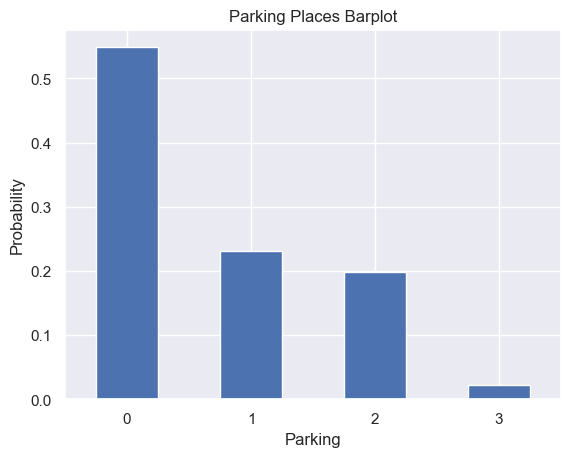

In [42]:
RelFreq_9 = houses['parking'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_9.plot.bar(rot=0, xlabel='Parking', ylabel ='Probability')
plt.title('Parking Places Barplot')
plt.show()

We could bin this variable into a dicotomic one that indicates wether the house has parking places or not, but it seems that we could lost valuable information for the next sections. We repeat the process with the last two factor columns.

### Variable `prefarea`

This variable informs about the area or neighbourhood, if it is considered as preferred or not.

In [43]:
print(houses['prefarea'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['prefarea'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['prefarea'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      417
Name: prefarea, dtype: object
------------------------------ 

Absolute Frequency: 

prefarea
no     417
yes    128
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

prefarea
no     0.765138
yes    0.234862
Name: proportion, dtype: float64
------------------------------ 



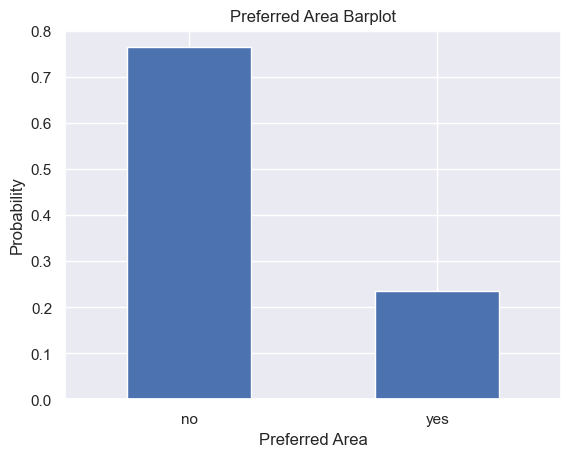

In [44]:
RelFreq_10 = houses['prefarea'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_10.plot.bar(rot=0, xlabel='Preferred Area', ylabel ='Probability')
plt.title('Preferred Area Barplot')
plt.show()

The results indicate that the majority of the homes are located in disliked locations, something usual in a random houses data set, due to the percentage of each of them in a city.

The last one to study is the column `furnishingstatus`, that reveals information about the furniture availbale in the house.

### Variable `furnishingstatus`

In [45]:
print(houses['furnishingstatus'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['furnishingstatus'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['furnishingstatus'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count                545
unique                 3
top       semi-furnished
freq                 227
Name: furnishingstatus, dtype: object
------------------------------ 

Absolute Frequency: 

furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

furnishingstatus
furnished         0.256881
semi-furnished    0.416514
unfurnished       0.326606
Name: proportion, dtype: float64
------------------------------ 



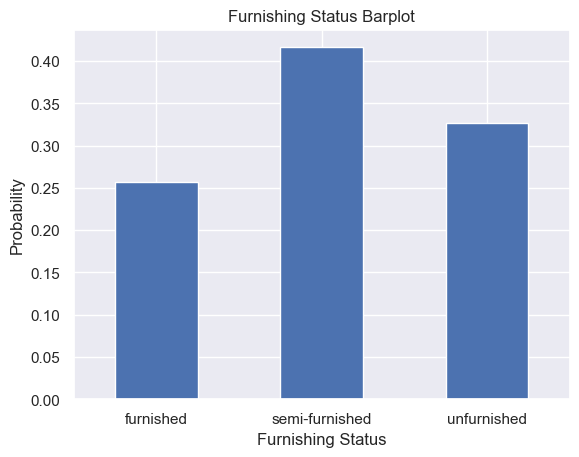

In [46]:
RelFreq_11 = houses['furnishingstatus'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_11.plot.bar(rot=0, xlabel='Furnishing Status', ylabel ='Probability')
plt.title('Furnishing Status Barplot')
plt.show()

As we can see, the main option are the semi-furnished houses. Behind that, 
there is a slightly higher percentage ofunfurnished  house, followed by the furnished ones

Just like it could be expected, the majority of the houses in the dataset have either 1 or 2 floors. Lets dig into this tendency by plotting some graphics.

### Variable `basement`

In this case, the variable basement is binary and, as could be expected, it represents if a house does or does not have a basement. This variable will be of interest when we try to model the price of a given house, as having a basement always increases the value of a house, so this one will probably turn out to be a significant variable for the price.

In [47]:
print(houses['basement'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['basement'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['basement'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")
 

count     545
unique      2
top        no
freq      354
Name: basement, dtype: object
------------------------------ 

Absolute Frequency: 

basement
no     354
yes    191
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

basement
no     0.649541
yes    0.350459
Name: proportion, dtype: float64
------------------------------ 



As we can see, about a 65% of the houses in the dataset do not have a basement. Let´s observe this proportion more appropiately using graphics

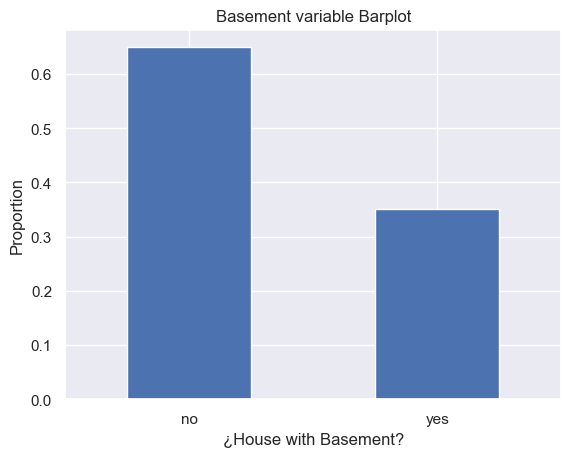

In [48]:
RelFreq_11 = houses['basement'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_11.plot.bar(rot=0, xlabel='¿House with Basement?', ylabel ='Proportion')
plt.title('Basement variable Barplot')
plt.show()
 

### Variable `hotwaterheating`

The next variable is again binary, and it explains whether a house includes a system to heat water or not. Again, it seems that this variable will be significant once we are trying to predict the price of a house, as having a water-heating system will always increase the value of a house.

In [49]:
print(houses['hotwaterheating'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['hotwaterheating'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['hotwaterheating'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")

count     545
unique      2
top        no
freq      520
Name: hotwaterheating, dtype: object
------------------------------ 

Absolute Frequency: 

hotwaterheating
no     520
yes     25
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

hotwaterheating
no     0.954128
yes    0.045872
Name: proportion, dtype: float64
------------------------------ 



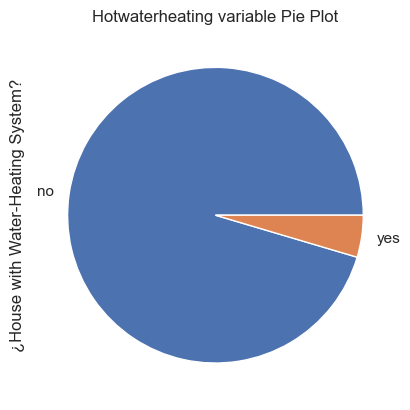

In [50]:
RelFreq_11 = houses['hotwaterheating'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_11.plot.pie(rot=0,ylabel="¿House with Water-Heating System?" )
plt.title('Hotwaterheating variable Pie Plot')
plt.show()

In this case, the previous analysis shows how only about a 4.5% of the houses studied do have a water-heating system.

### Variable `airconditioning`

The analysis ends up with the variable airconditioning, which, as expected, is a binary variable indicating if a house has an air conditioning system or not.

In [51]:
print(houses['airconditioning'].describe())
print("-" * 30, "\n")
print("Absolute Frequency: \n")
print(houses['airconditioning'].value_counts().sort_index())
print("-" * 30, "\n")
print("Relative Frequency: \n")
print(houses['airconditioning'].value_counts(normalize = True).sort_index())
print("-" * 30, "\n")
 

count     545
unique      2
top        no
freq      373
Name: airconditioning, dtype: object
------------------------------ 

Absolute Frequency: 

airconditioning
no     373
yes    172
Name: count, dtype: int64
------------------------------ 

Relative Frequency: 

airconditioning
no     0.684404
yes    0.315596
Name: proportion, dtype: float64
------------------------------ 



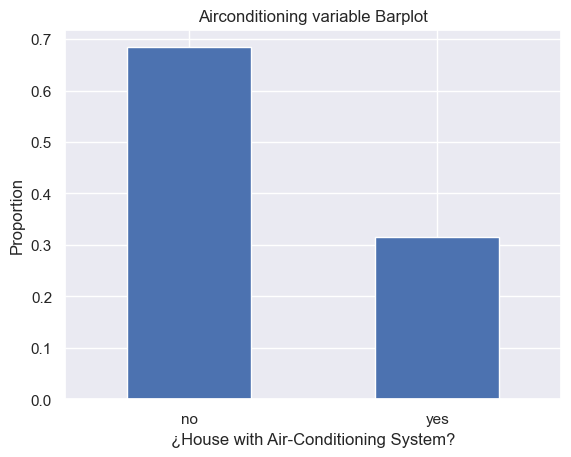

In [52]:
RelFreq_11 = houses['airconditioning'].value_counts(normalize = True).sort_index()
sns.set()
plot = RelFreq_11.plot.bar(rot=0, xlabel='¿House with Air-Conditioning System?', ylabel ='Proportion')
plt.title('Airconditioning variable Barplot')
plt.show()
 

As we can see, having an air conditioning system(31.5%) is more likely among the houses in the dataset than having a water-heating system(4.5%), but less likely than having a basement(35%).
​